In [29]:
import pandas as pd
import numpy as np

In [30]:
df = pd.read_csv('svbr.csv', delimiter=';')

In [31]:
df.head()

,Canal,Inscritos,Visualizações
0,Site Arqueologia Egípcia,13438.0,406590
1,Terra Negra,35241.0,868235
2,Frank Jaava,31680.0,2856508
3,Dispersciência,25100.0,150000
4,Olá Ciência,32788.0,1575456


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizações  47 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [33]:
df.isna().sum()

Canal            0
Inscritos        1
Visualizações    0
dtype: int64

In [34]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False)

Inscritos        2.12766
Canal            0.00000
Visualizações    0.00000
dtype: float64

In [35]:
df.describe()

,Inscritos,Visualizações
count,4.600000e+01,4.700000e+01
mean,1.537118e+05,1.007036e+07
std,2.763771e+05,2.411507e+07
min,2.308000e+03,1.615000e+04
25%,1.349375e+04,5.526835e+05
50%,4.979700e+04,1.603700e+06
75%,1.337050e+05,5.195652e+06
max,1.423056e+06,1.187416e+08


In [36]:
df.rename(columns={'Visualizações': 'Visualizacoes'}, inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Canal          47 non-null     object 
 1   Inscritos      46 non-null     float64
 2   Visualizacoes  47 non-null     int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB


In [38]:
df['Visualizacoes'] = df['Visualizacoes'].apply(lambda x: x if str(x).replace('.', '', 1).isdigit() else np.nan)

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
columns_to_impute = ['Visualizacoes', 'Inscritos']

for col in columns_to_impute:
  imputer = SimpleImputer(missing_values=np.nan, strategy='median')
  imputer = imputer.fit(df[[col]])
  df[col] = imputer.transform(df[[col]])

In [41]:
df

,Canal,Inscritos,Visualizacoes
0,Site Arqueologia Egípcia,13438.0,406590.0
1,Terra Negra,35241.0,868235.0
2,Frank Jaava,31680.0,2856508.0
3,Dispersciência,25100.0,150000.0
4,Olá Ciência,32788.0,1575456.0
5,A matemaníaca por Julia Jaccoud,65453.0,1667892.0
6,Delta T - Os super lentos,12000.0,171361.0
7,Bláblálogia,161951.0,11027386.0
8,Efarsas,78876.0,6226235.0
9,Minuto da Terra,274196.0,30166457.0


In [50]:
X = df.drop(columns=['Visualizacoes'])
y = df.drop(columns=['Inscritos'])

In [55]:
X.head()

,Canal,Inscritos
0,Site Arqueologia Egípcia,13438.0
1,Terra Negra,35241.0
2,Frank Jaava,31680.0
3,Dispersciência,25100.0
4,Olá Ciência,32788.0


In [56]:
y.head()

,Canal,Visualizacoes
0,Site Arqueologia Egípcia,406590.0
1,Terra Negra,868235.0
2,Frank Jaava,2856508.0
3,Dispersciência,150000.0
4,Olá Ciência,1575456.0


In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
f'X train length: {len(X_train)}, X test length: {len(X_test)}, y train length: {len(y_train)}, y test length: {len(y_test)}'

'X train length: 37, X test length: 10, y train length: 37, y test length: 10'

In [63]:
X_train_regressor = X_train['Inscritos'].values.reshape(-1, 1)
y_train_regressor = y_train['Visualizacoes'].values

In [53]:
from sklearn.linear_model import LinearRegression

In [64]:
regressor = LinearRegression()
regressor.fit(X_train_regressor, y_train_regressor)

LinearRegression()

In [66]:
X_test_regressor = X_test['Inscritos'].values.reshape(-1, 1)

In [67]:
y_pred = regressor.predict(X_test_regressor)

In [76]:
y_pred

array([ 4969257.22161489, 56722621.56056108, 24124814.62529698,
        3353493.33280701,  8112662.17090407,  -511781.65962591,
        -415483.17726446,  7733901.5429939 ,  1255164.81526926,
        -331046.09460933])

In [73]:
df_pred = pd.DataFrame({'Canal': X_test['Canal'], 'Visualizacoes': y_pred})

In [90]:
y_test.values

array([['Eu, Ciência', 1616496.0],
       ['Schwarza - Poligonautas', 118741623.0],
       ['Papo de Biólogo', 12139385.0],
       ['Portal da Ciência', 2139717.0],
       ['Alimente o Cérebro', 3375528.0],
       ['Dragões de Garagem', 82599.0],
       ['Universo Racionalista', 43662.0],
       ['Ponto em Comum', 5027880.0],
       ['Olá Ciência', 1575456.0],
       ['Canal Zoa', 683190.0]], dtype=object)

In [89]:
df_pred.values

array([['Eu, Ciência', 4969257.221614891],
       ['Schwarza - Poligonautas', 56722621.560561076],
       ['Papo de Biólogo', 24124814.62529698],
       ['Portal da Ciência', 3353493.3328070054],
       ['Alimente o Cérebro', 8112662.170904074],
       ['Dragões de Garagem', -511781.6596259102],
       ['Universo Racionalista', -415483.1772644598],
       ['Ponto em Comum', 7733901.542993901],
       ['Olá Ciência', 1255164.815269263],
       ['Canal Zoa', -331046.09460932587]], dtype=object)

In [78]:
import matplotlib.pyplot as plt

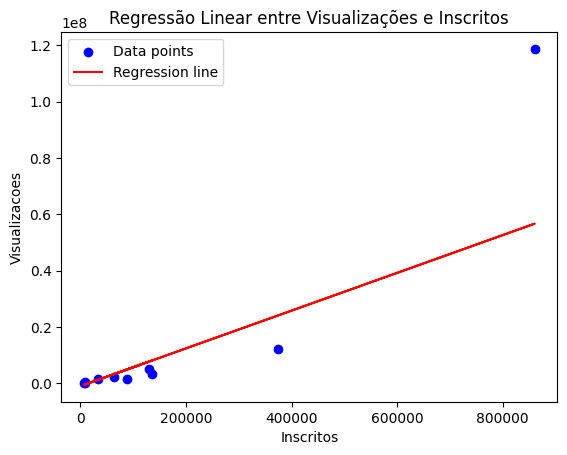

In [84]:
plt.scatter(X_test['Inscritos'], y_test['Visualizacoes'], color='blue', label='Data points')
plt.plot(X_test['Inscritos'], y_pred, color='red', label='Regression line')
plt.xlabel('Inscritos')
plt.ylabel('Visualizacoes')
plt.title('Regressão Linear entre Visualizações e Inscritos')
plt.legend()
plt.show()

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

In [93]:
mse = mean_squared_error(y_test['Visualizacoes'], y_pred)
r2 = r2_score(y_test['Visualizacoes'], y_pred)

In [94]:
f'Mean Squared Error: {mse}, R^2 Score: {r2}'

'Mean Squared Error: 403417968034858.2, R^2 Score: 0.6687566953308732'